*** Mushroom Calssifications using KNN ***

https://www.kaggle.com/datasets/uciml/mushroom-classification

**Goal** - Predict if the mushroom is Edible or Poisonous (Class)


**Setup**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import zipfile

In [189]:
#read file
with zipfile.ZipFile('/content/drive/MyDrive/ds/C6-Data-Mushroom.csv.zip') as z:
   # open the csv file in the dataset
   with z.open('mushrooms.csv') as f:

      # read the dataset (first row is the url of the dataser)
      df = pd.read_csv(f,skiprows=1)
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [102]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Target variable (Class) is balanced

<Axes: xlabel='class', ylabel='count'>

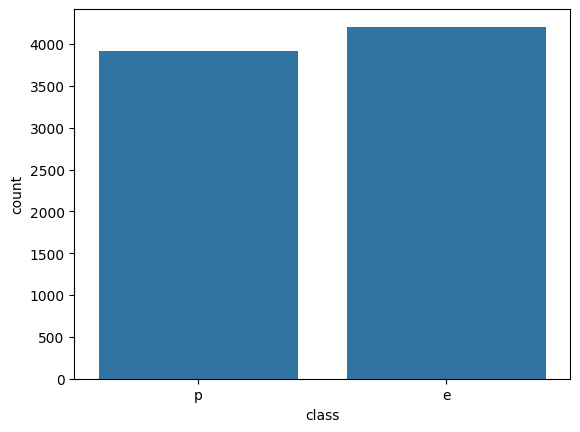

In [161]:
sns.countplot(data=df, x='class')

 There is a weak positive Correlation for Cap-Shape and Gill-Size and a negatvie positive correlation for Gill color.

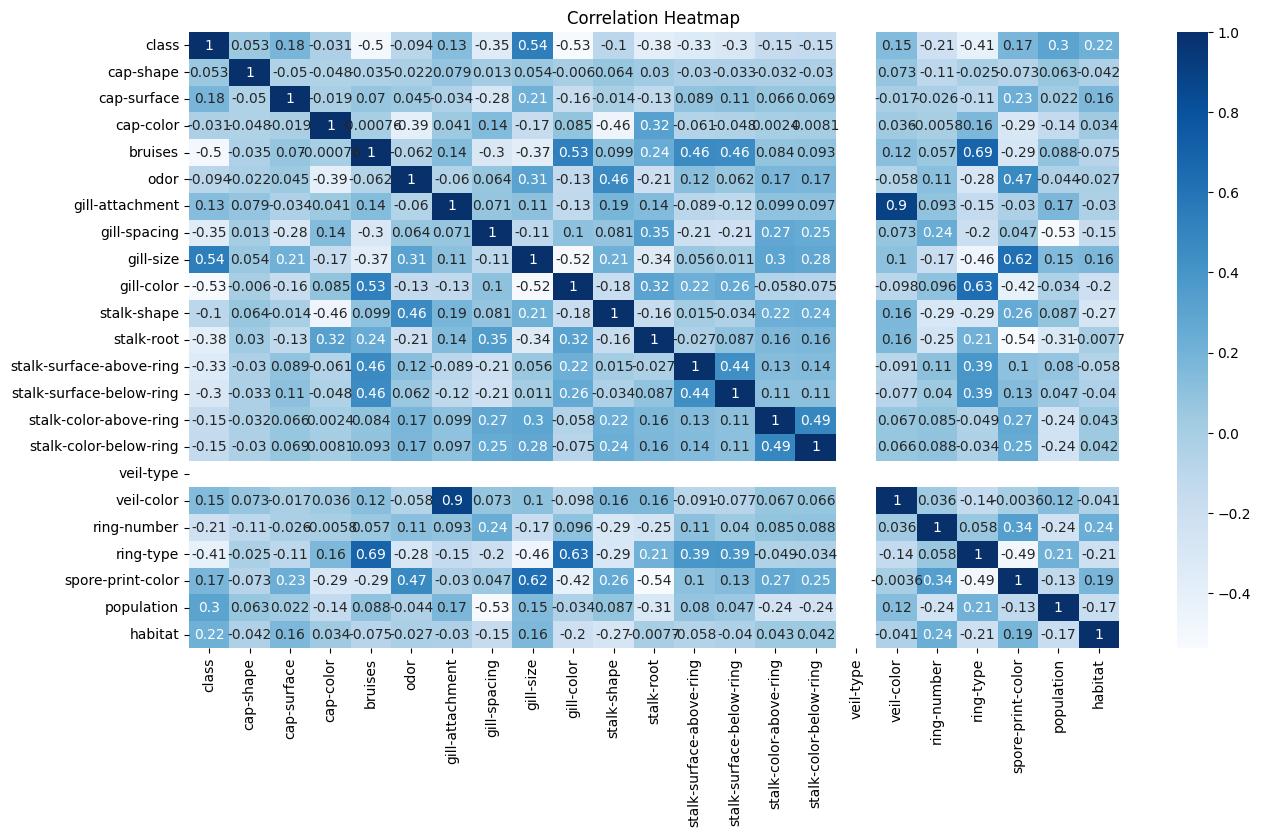

In [190]:
df_binary = pd.get_dummies(df.drop('class',axis=1))
y = df['class']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

label_encoder = LabelEncoder()
df_corr = df.apply(label_encoder.fit_transform)

# defining the figure size
plt.figure(figsize=(15, 8))
# plotting the heatmap
sns.heatmap(df_corr.corr(), annot=True, cbar=True,cmap='Blues')
# set the title
plt.title('Correlation Heatmap')
# show the plot
plt.show()

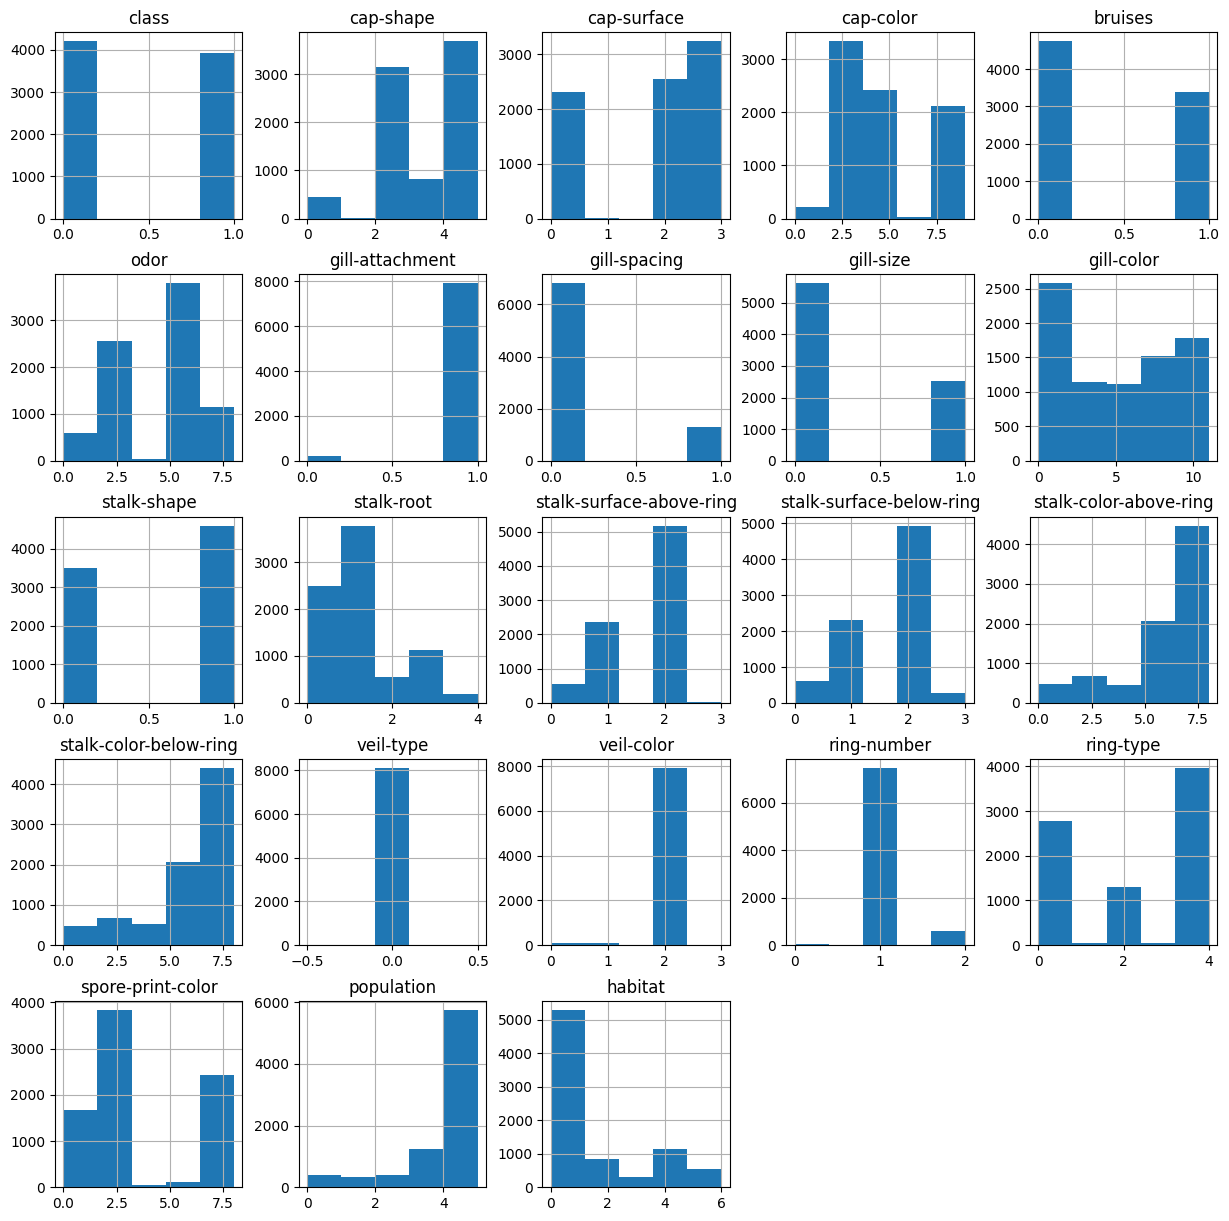

In [191]:
#Take a View of all features to gain insights
df_corr.hist(bins=5, figsize=(15,15));


Drop veil-type because is not discriminatory

In [192]:
#Removing columns with no descrimination
print("All columns",df.shape[1])


All columns 23


I´ll create 2 Datasets to train the model, Binary (with all columns) and a reduced approach using PCA

In [142]:
X = df_binary
pca = PCA(.95)
x_pc = pca.fit_transform(X)
print('# number of PCA components ',x_pc.shape[1])


# number of PCA components  40


**Train Test Split and Fitting Model**

In [179]:
#binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#pca
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(x_pc, y, test_size = 0.20)

def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

def knn_tuning_pc(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train_pc, y_train_pc)
  y_pred = classifier.predict(X_test_pc)
  accuracy = accuracy_score(y_test_pc,y_pred)
  return accuracy

knn_results = pd.DataFrame({'K':np.arange(1, 116, 5)})

knn_results['Accuracy_knn_binary'] = knn_results['K'].apply(knn_tuning)
knn_results['Accuracy_knn_pc'] = knn_results['K'].apply(knn_tuning_pc)



1 to 11 K has an accuracy of 100% . This is suspicious

In [180]:
knn_results

,K,Accuracy_knn_binary,Accuracy_knn_pc
0,1,1.000000,1.000000
1,6,1.000000,1.000000
2,11,1.000000,0.997538
3,16,0.999590,0.998154
4,21,0.999590,0.996923
5,26,0.999590,0.996308
6,31,0.999590,0.995077
7,36,0.999590,0.995077
8,41,0.999590,0.993231
9,46,0.999590,0.992615


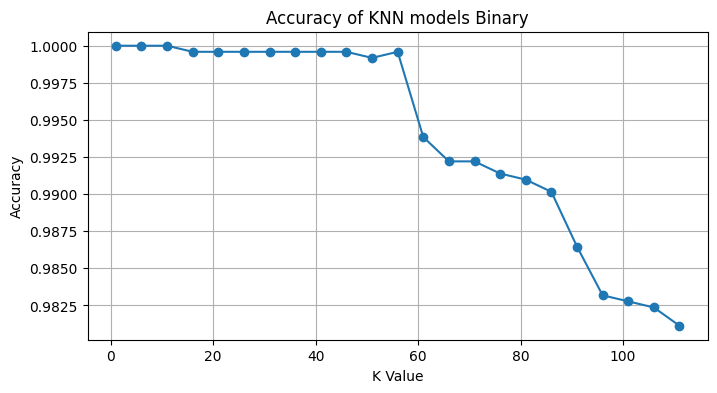

In [186]:
# Visualize the accuracy of KNN models binary
k_values = knn_results['K']
k_accuracies = knn_results['Accuracy_knn_binary']

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models Binary')
plt.grid(True)
plt.show()



In [157]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[845   0]
 [  0 780]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


Test the Model Performance with Cross Validation and 1 K.
The accuracy of 100% continues. The data encoded is more than enough to predict the results, no need to use the PCA approach

In [184]:
#KNN grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [1],
    'weights': [ 'uniform'],
    'p': [2],
    'leaf_size': [30]
}

# Initialize GridSearchCV with KNeighborsClassifier
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_knn = grid_search.best_estimator_

# Predict with the best model
y_pred_train_knn = best_knn.predict(X_train)
y_pred_test_knn = best_knn.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters found by grid search:")
print(grid_search.best_params_)



def calculate_metrics(y_test, y_pred_test):
    # Calculate precision
    precision_test = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    # Calculate recall
    recall_test = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

    return {
        'precision_test': precision_test,
        'recall_test': recall_test,
        'confusion_matrix': conf_matrix
    }


# Sample DataFrame with metrics placeholders
acc = np.zeros((1, 2))
columns = ['precision', 'recall']
rows = [ 'KNN']
results_df = pd.DataFrame(acc, columns=columns, index=rows)
# Calculate metrics
metrics = calculate_metrics(y_test, y_pred_test_knn)


# Print metrics
print(f"Precision (Test): {metrics['precision_test']:.2f}")
print(f"Recall (Test): {metrics['recall_test']:.2f}")
print("Confusion Matrix:")
print(metrics['confusion_matrix'])

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters found by grid search:
{'leaf_size': 30, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Precision (Test): 1.00
Recall (Test): 1.00
Confusion Matrix:
[[1281    0]
 [   0 1157]]
